## Live Coding 2 🎥

# Deep Learning Basics with PyTorch 🔥

Hi Everyone 👋

**Daniel's Tutorial:** 
- https://www.learnpytorch.io/03_pytorch_computer_vision/#what-were-going-to-cover

## 01. What's we're going to cover

Today we're going to train ower first vison model using PyTorch 🔥.

The **FashionMNIST** dataset: 

<center><img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-fashion-mnist-slide.png" width=600px>

start to import **PyTorch** and its vison extenstion as **TorchVision**: 

In [35]:
# Import PyTorch
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.4.0+cpu
torchvision version: 0.19.0+cpu


In [11]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [12]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26421880/26421880 [00:16<00:00, 1640901.06it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 29515/29515 [00:00<00:00, 534114.33it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4422102/4422102 [00:02<00:00, 1670439.23it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5148/5148 [00:00<00:00, 5259994.40it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [36]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [37]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [38]:
image, lable = train_data[0]

In [39]:
lable

9

In [19]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [31]:
len(train_data.classes)

10

In [20]:
train_data.classes[9]

'Ankle boot'

In [22]:
image.shape

torch.Size([1, 28, 28])

In [28]:
image, label = train_data[150]

In [30]:
lable

9

In [46]:
def plot_image(image: torch.Tensor):
    print(f"Image shape: {image.shape}")
    plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
    plt.title(label)

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

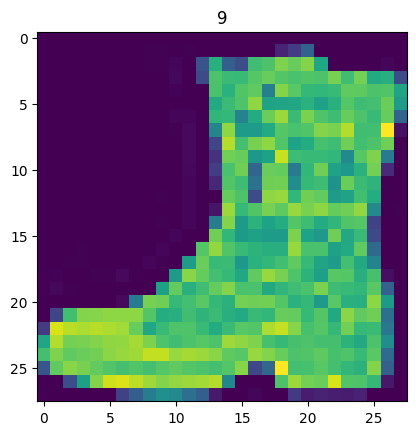

In [29]:
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label)

In [33]:
# See classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

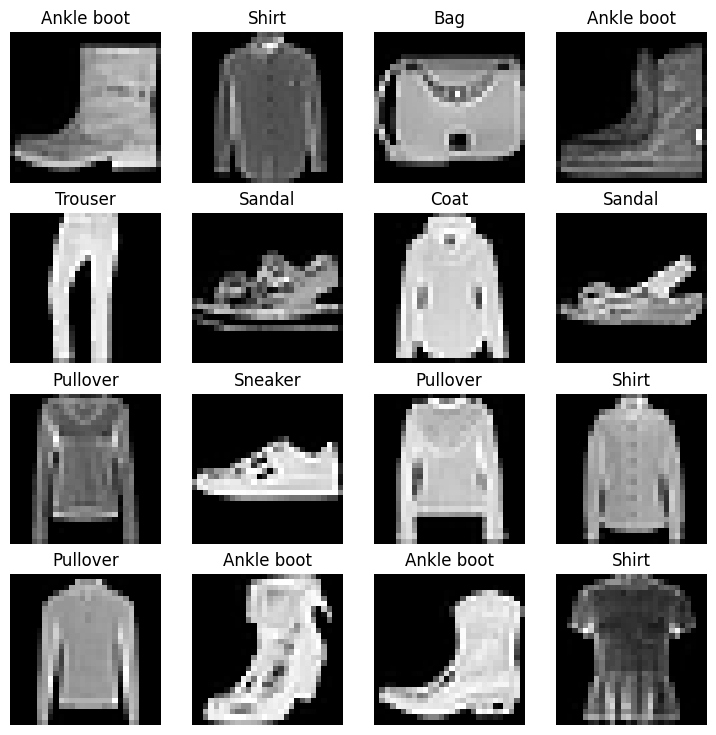

In [34]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## DataLoader

In [40]:
train_loader = DataLoader(
    dataset= train_data,
    shuffle= True,
    batch_size=32
)

In [41]:
test_loader = DataLoader(
    dataset= test_data,
    shuffle= True,
    batch_size=32
)

In [42]:
images, lables = next(iter(train_loader))

In [48]:
images.shape

torch.Size([32, 1, 28, 28])

Image shape: torch.Size([1, 28, 28])


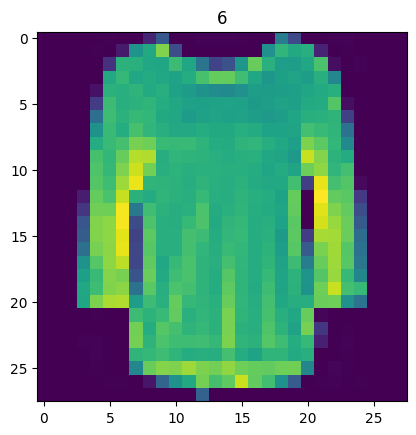

In [53]:
plot_image(images[31])

In [55]:
lables

tensor([5, 1, 8, 1, 5, 2, 6, 7, 3, 5, 9, 5, 7, 5, 0, 4, 4, 4, 4, 6, 1, 8, 0, 1,
        9, 7, 8, 8, 3, 3, 7, 2])

In [56]:
lables.shape

torch.Size([32])

In [59]:
images[0].shape

torch.Size([1, 28, 28])

In [60]:
28 * 28

784

In [62]:
images[0].flatten().shape

torch.Size([784])

## Model Building

In [85]:
class FashionMNSITVisionModelV1(nn.Module):

    def __init__(self, ):
        super(FashionMNSITVisionModelV1, self).__init__()

        self.flatten_layer = nn.Flatten()

        self.fc = nn.Sequential(
            nn.Linear(in_features= 784, out_features= 16),
            nn.Linear(in_features= 16, out_features= 16),
            nn.Linear(in_features= 16, out_features= 10),
        )

        self.softmax = nn.Softmax(dim=-1)

    def forward(self, input_imgs: torch.Tensor):

        out = self.flatten_layer(input_imgs)

        out = self.fc(out)

        out = self.softmax(out)

        return out        

In [116]:
modelv1 = FashionMNSITVisionModelV1()

In [117]:
modelv1

FashionMNSITVisionModelV1(
  (flatten_layer): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
  (softmax): Softmax(dim=-1)
)

In [118]:
img1 = images[0]

Image shape: torch.Size([1, 28, 28])


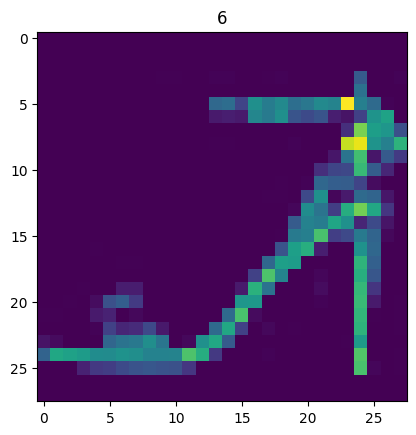

In [119]:
plot_image(img1)

In [120]:
out = modelv1(img1)
out

tensor([[0.0963, 0.0766, 0.1253, 0.1039, 0.1120, 0.1075, 0.0794, 0.0897, 0.1113,
         0.0980]], grad_fn=<SoftmaxBackward0>)

In [121]:
out.sum()

tensor(1., grad_fn=<SumBackward0>)

In [122]:
out.argmax()

tensor(2)

In [123]:
lables[0]

tensor(5)

## Train Model

In [124]:
loss_fn = nn.CrossEntropyLoss()

In [129]:
opt = torch.optim.Adam(modelv1.parameters(), lr=0.001)

In [126]:
def train_model(
    model, 
    train_loader,
    loss_fn, 
    optimizer,
    epochs: int = 3
):

    for epoch in range(epochs):

        total_loss = 0
        
        for images, lables in train_loader:

            optimizer.zero_grad()

            pred = model(images)

            loss = loss_fn(pred, lables)

            total_loss += loss.item()

            loss.backward()

            optimizer.step()

        total_loss /= len(train_loader)
        
        print(f"Train Model: {epoch}/{epochs}| Loss: {total_loss}")

In [131]:
train_model(
    model= modelv1, 
    train_loader= train_loader,
    optimizer= opt, 
    loss_fn= loss_fn,
    epochs= 5
)

Train Model: 0/5| Loss: 1.7596215504964192
Train Model: 1/5| Loss: 1.7541772163391114
Train Model: 2/5| Loss: 1.755731177775065
Train Model: 3/5| Loss: 1.755658364868164
Train Model: 4/5| Loss: 1.7548597989400228


In [132]:
torch.cuda.is_available()

False